# Using the model to submit to kaggle

Link to the competition: https://www.kaggle.com/competitions/digit-recognizer

In [16]:
import pandas as pd 
import numpy as np
np.random.seed(1212)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt
%matplotlib inline 


from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
print("Libraries loaded successfully")

Libraries loaded successfully


In [17]:
def check_data():
    df_train = pd.read_csv("./train.csv")
    df_test = pd.read_csv("./test.csv") 
    print(df_train.iloc[0])    
    
check_data()

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64


Train data (X) shape: (42000, 28, 28, 1)
Test data (X) shape: (28000, 28, 28, 1)
Train data (Y) shape: (42000, 10)


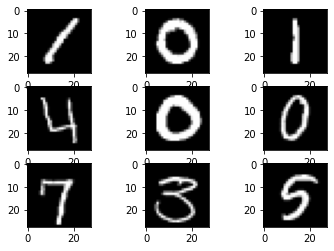

In [18]:
# load train and test dataset
def load_dataset():
    # load dataset
    df_train = pd.read_csv("./train.csv")
    df_test = pd.read_csv("./test.csv")     
    
    trainX = (df_train.iloc[ :,1:]).to_numpy() #1st column is label
    trainY = (df_train.iloc[ :,0]).to_numpy()    
    
    testX = df_test.to_numpy()    
    
    trainX = np.reshape(trainX, (-1,28,28))
    testX = np.reshape(testX, (-1,28,28))
   
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)    
    return trainX, trainY, testX

#scale test and train images
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm


def check_data():
    # load dataset
    trainX, trainY, testX= load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    print("Train data (X) shape:",trainX.shape)
    print("Test data (X) shape:",testX.shape)
    print("Train data (Y) shape:",trainY.shape)
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(trainX[i], cmap=('gray'))
    
    plt.show()
    
check_data()

## Model definition

In [6]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')) 
    #RELU activation present.It is not 2 consecutive linear layers
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9) #stochastic gradient descent optimizer
    
    #opt =Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999,epsilon=1e-07, amsgrad=False )
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
test_model=define_model()
test_model.summary()
print("Model defined successfully")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
#Train the final model and Check Test set accuracy
# load dataset
trainX, trainY, testX = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

model = define_model()
history = model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

#epocs=4 for adam optimizer as it reaches minima faster


Epoch 1/10
1313/1313 - 7s - loss: 0.1517 - accuracy: 0.9514 - 7s/epoch - 5ms/step
Epoch 2/10
1313/1313 - 4s - loss: 0.0499 - accuracy: 0.9838 - 4s/epoch - 3ms/step
Epoch 3/10
1313/1313 - 4s - loss: 0.0318 - accuracy: 0.9900 - 4s/epoch - 3ms/step
Epoch 4/10
1313/1313 - 4s - loss: 0.0235 - accuracy: 0.9925 - 4s/epoch - 3ms/step
Epoch 5/10
1313/1313 - 4s - loss: 0.0165 - accuracy: 0.9948 - 4s/epoch - 3ms/step
Epoch 6/10
1313/1313 - 4s - loss: 0.0134 - accuracy: 0.9952 - 4s/epoch - 3ms/step
Epoch 7/10
1313/1313 - 4s - loss: 0.0097 - accuracy: 0.9970 - 4s/epoch - 3ms/step
Epoch 8/10
1313/1313 - 4s - loss: 0.0077 - accuracy: 0.9976 - 4s/epoch - 3ms/step
Epoch 9/10
1313/1313 - 4s - loss: 0.0048 - accuracy: 0.9986 - 4s/epoch - 3ms/step
Epoch 10/10
1313/1313 - 4s - loss: 0.0038 - accuracy: 0.9989 - 4s/epoch - 3ms/step


In [11]:
# history.history # adictionary
print('Train accuracy:', history.history['accuracy'][-1]*100,'%') #last element of accuracy list


Train accuracy: 99.89285469055176 %


### Optimizer Performance Comparision
SGD (Stochastic Gradient Descent). Epochs=10. Learning rate=0.01, momentum=0.9
Test accuracy: 99.16999936103821 %

Adam Optimizer.Epochs=4. Learning Rate=0.001
Test accuracy: 99.02%

In [12]:

def predict_save(model):
    out= model.predict(testX, verbose=1, batch_size=200) #out is a numpy array of (28000, 10)
    y_pred = np.argmax(out,axis=1)
    print("y_pred.shape",y_pred.shape)  #gives the index of the maximum prob along the axis=1, along each row
    y_pred= y_pred[ : ,np.newaxis]
    print("y_pred.shape",y_pred.shape)

    Id= np.arange(1,y_pred.shape[0]+1)
    Id=Id[ : ,np.newaxis] # we cant join without this extra axis
    print("Id.shape",Id.shape)

    x = np.concatenate((Id, y_pred), axis=1)
    #x =[ a y_final] # does not work bcoz we are not dealing with lists, we are dealing with numpy arrays
    print("x.shape",x.shape)
    column_values = ['ImageId', 'Label']
    submission = pd.DataFrame(data = x, columns = column_values)
    print(submission.head())
    submission.to_csv('my_submission.csv',index=False)
    
    
predict_save(model)

140/140 [==============================] - 1s 3ms/step
y_pred.shape (28000,)
y_pred.shape (28000, 1)
Id.shape (28000, 1)
x.shape (28000, 2)
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
